In [ ]:
import numpy as np
import pandas as pd
import os
import torch
import torchvision
import torchsample
import psycopg2
import random
import re
import time
import csv
import copy

from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torch.utils.data.sampler import WeightedRandomSampler
from torchvision import models
from torchvision import transforms
from torchsample import transforms as ts_transforms

from matplotlib import pyplot as plt
from PIL import Image
from scipy.ndimage import imread
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from mpl_toolkits.mplot3d import Axes3D
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [4]:
test_features = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/test_images.npy')
test_targets = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/test_targets.npy')
test_filepaths = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/test_filepaths.npy')

In [3]:
X_train = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/highway_train_images.npy')
y_train = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/highway_train_targets.npy')
y_paths = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/highway_train_filepaths.npy')

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM742/ID10906/201712/A2-HM742-ID10906_20171202_0810.jpg


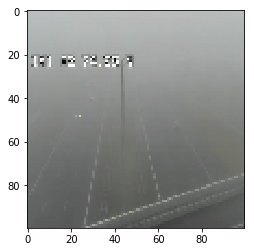

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM748/ID10907/201712/A2-HM748-ID10907_20171202_1130.jpg


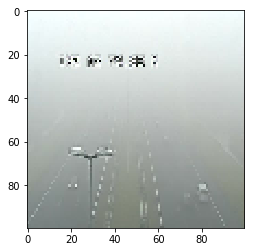

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM755/ID10910/201712/A2-HM755-ID10910_20171211_1140.jpg


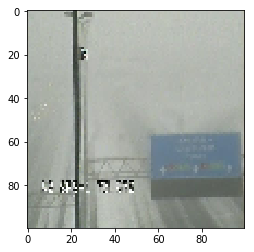

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM755/ID10910/201712/A2-HM755-ID10910_20171220_0931.jpg


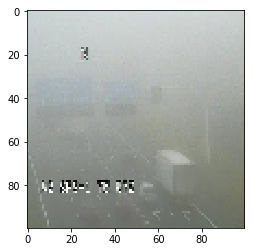

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM758/ID10911/201712/A2-HM758-ID10911_20171201_0850.jpg


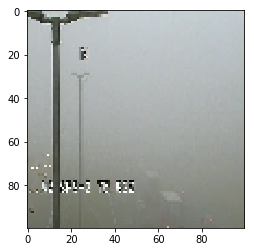

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM761/ID10912/201802/A2-HM761-ID10912_20180210_0720.jpg


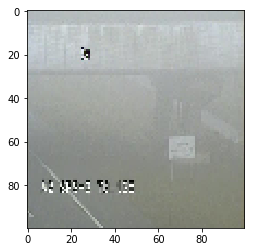

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM770/ID10914/201712/A2-HM770-ID10914_20171222_0840.jpg


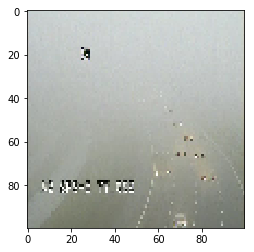

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM776/ID10915/201707/A2-HM776-ID10915_20170706_0352.jpg


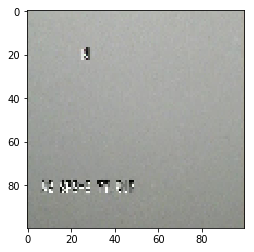

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM778/ID10916/201708/A2-HM778-ID10916_20170813_0532.jpg


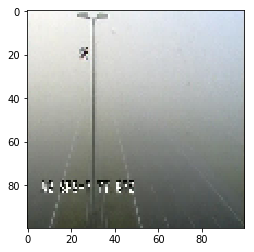

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM778/ID10916/201712/A2-HM778-ID10916_20171221_0810.jpg


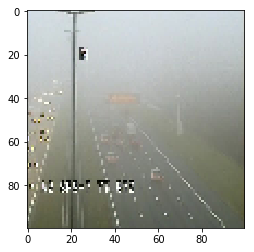

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM784/ID10917/201709/A2-HM784-ID10917_20170903_0541.jpg


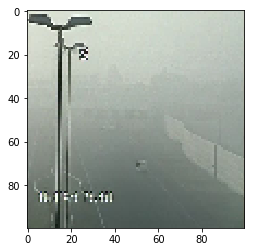

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM784/ID10917/201709/A2-HM784-ID10917_20170917_0511.jpg


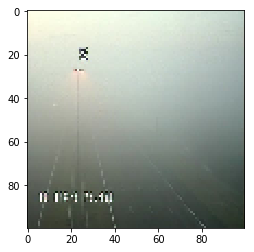

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM784/ID10917/201712/A2-HM784-ID10917_20171202_0830.jpg


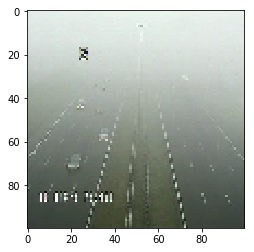

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM790/ID10918/201712/A2-HM790-ID10918_20171202_0830.jpg


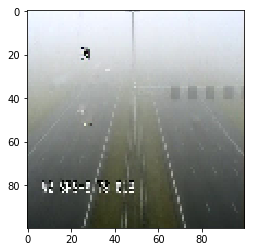

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM905/ID13470/201712/A2-HM905-ID13470_20171202_1100.jpg


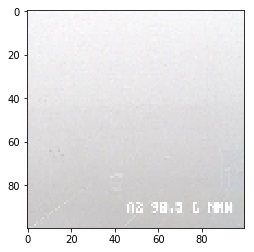

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM905/ID13470/201712/A2-HM905-ID13470_20171202_0950.jpg


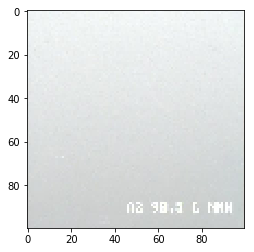

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM905/ID13470/201712/A2-HM905-ID13470_20171202_1300.jpg


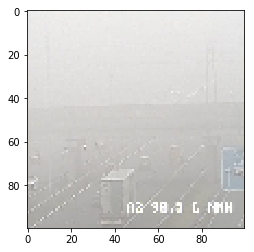

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM577/ID10979/201712/A27-HM577-ID10979_20171202_0810.jpg


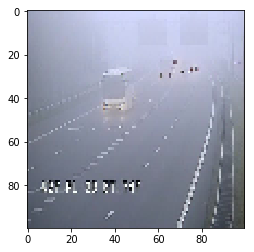

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM577/ID10979/201712/A27-HM577-ID10979_20171202_0900.jpg


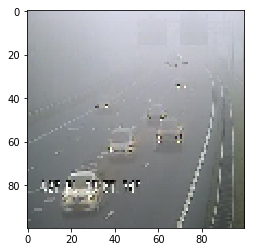

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM579/ID10978/201803/A27-HM579-ID10978_20180313_0830.jpg


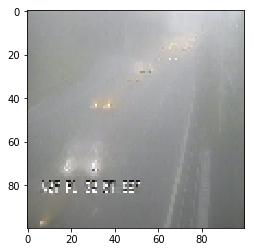

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM579/ID10978/201803/A27-HM579-ID10978_20180326_0710.jpg


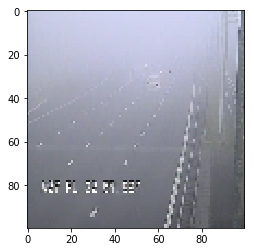

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM582/ID10977/201711/A27-HM582-ID10977_20171107_0700.jpg


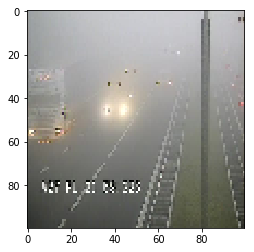

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM582/ID10977/201711/A27-HM582-ID10977_20171107_0710.jpg


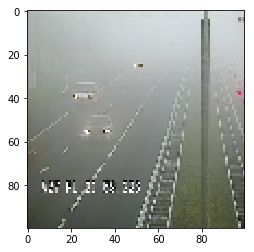

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM582/ID10977/201711/A27-HM582-ID10977_20171107_0720.jpg


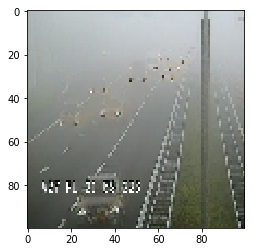

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM582/ID10977/201711/A27-HM582-ID10977_20171107_0740.jpg


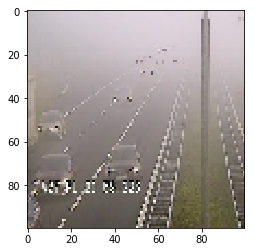

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM582/ID10977/201711/A27-HM582-ID10977_20171107_0750.jpg


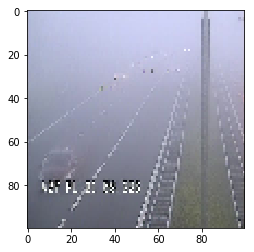

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM584/ID10976/201709/A27-HM584-ID10976_20170917_0701.jpg


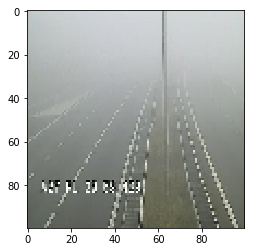

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM584/ID10976/201709/A27-HM584-ID10976_20170917_0711.jpg


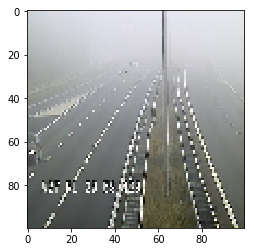

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM584/ID10976/201709/A27-HM584-ID10976_20170917_0731.jpg


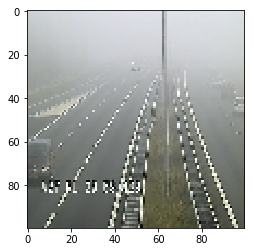

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM584/ID10976/201709/A27-HM584-ID10976_20170926_0651.jpg


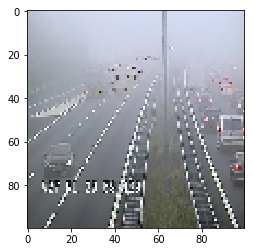

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM584/ID10976/201709/A27-HM584-ID10976_20170926_0701.jpg


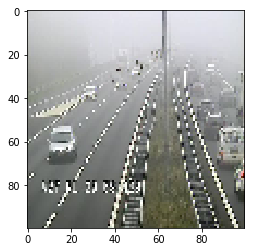

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM589/ID10974/201709/A27-HM589-ID10974_20170919_0611.jpg


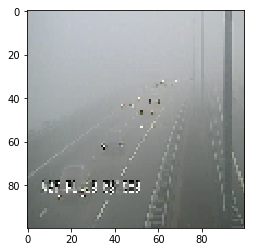

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM589/ID10974/201709/A27-HM589-ID10974_20170919_0631.jpg


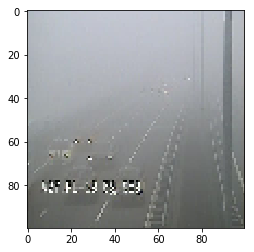

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM589/ID10974/201709/A27-HM589-ID10974_20170919_0641.jpg


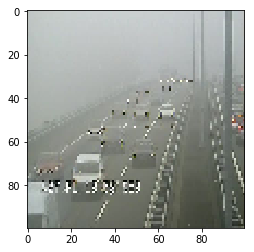

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM589/ID10974/201709/A27-HM589-ID10974_20170919_0621.jpg


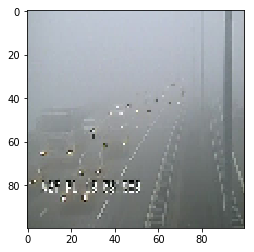

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM589/ID10974/201709/A27-HM589-ID10974_20170923_0731.jpg


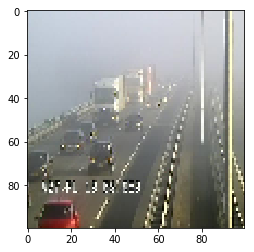

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM589/ID10974/201709/A27-HM589-ID10974_20170926_0701.jpg


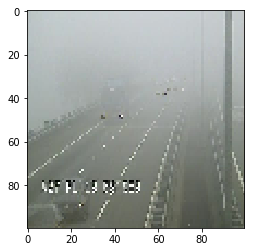

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM589/ID10974/201709/A27-HM589-ID10974_20170927_0721.jpg


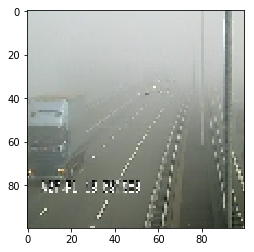

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM641/ID10973/201803/A27-HM641-ID10973_20180321_0700.jpg


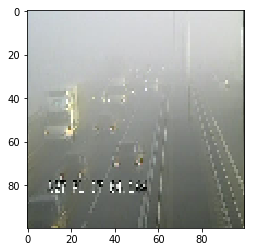

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM641/ID10973/201803/A27-HM641-ID10973_20180321_0710.jpg


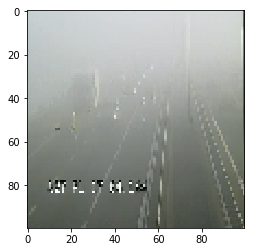

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM641/ID10973/201803/A27-HM641-ID10973_20180321_0730.jpg


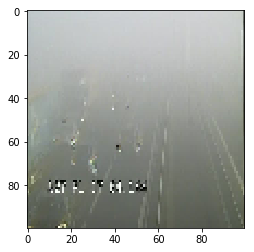

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM641/ID10973/201803/A27-HM641-ID10973_20180326_0630.jpg


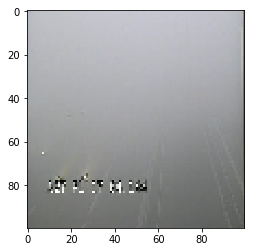

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM641/ID10973/201803/A27-HM641-ID10973_20180326_0730.jpg


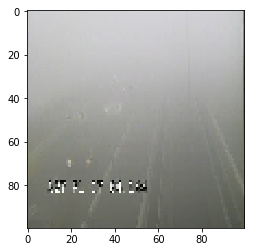

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM641/ID10973/201803/A27-HM641-ID10973_20180326_0800.jpg


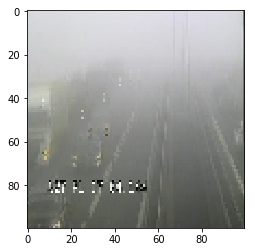

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM645/ID10971/201712/A27-HM645-ID10971_20171201_0900.jpg


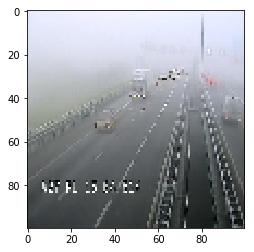

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM645/ID10971/201712/A27-HM645-ID10971_20171202_0810.jpg


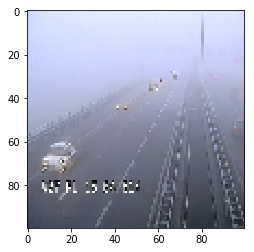

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM645/ID10971/201712/A27-HM645-ID10971_20171202_0830.jpg


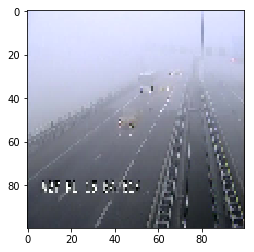

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM645/ID10971/201712/A27-HM645-ID10971_20171202_1100.jpg


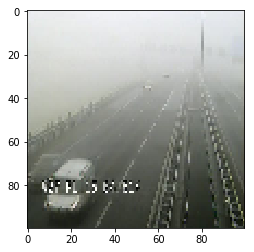

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM645/ID10971/201712/A27-HM645-ID10971_20171222_0850.jpg


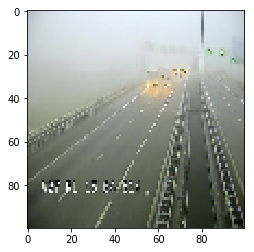

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM645/ID10971/201712/A27-HM645-ID10971_20171222_0930.jpg


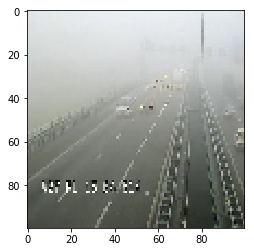

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171201_0800.jpg


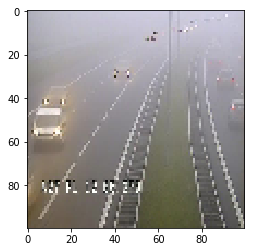

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171201_0810.jpg


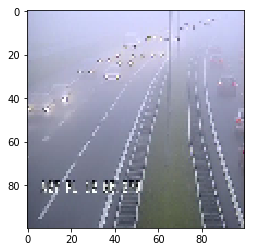

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171202_0750.jpg


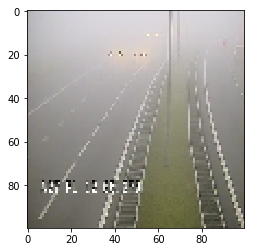

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171202_0800.jpg


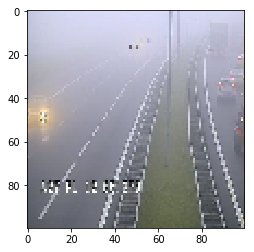

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171202_0810.jpg


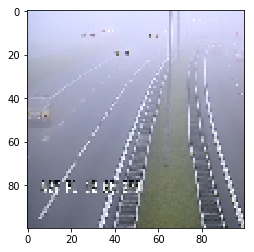

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171202_0900.jpg


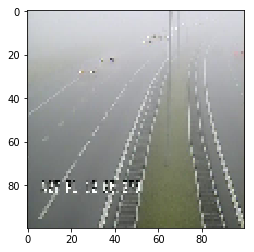

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171202_0850.jpg


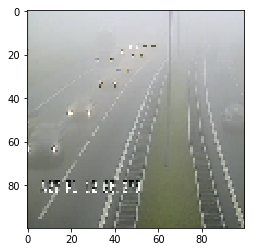

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171202_1010.jpg


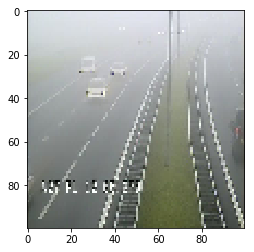

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM657/ID10966/201712/A27-HM657-ID10966_20171202_0810.jpg


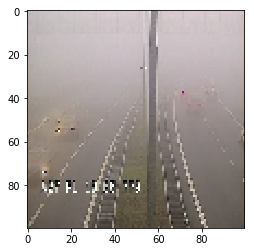

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM657/ID10966/201712/A27-HM657-ID10966_20171202_0800.jpg


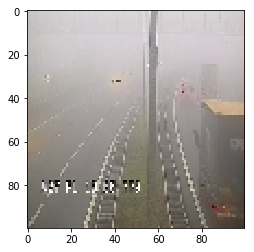

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM657/ID10966/201712/A27-HM657-ID10966_20171202_0830.jpg


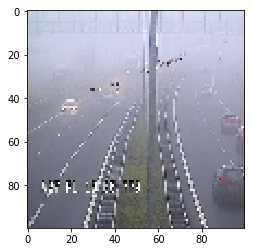

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM657/ID10966/201712/A27-HM657-ID10966_20171202_0840.jpg


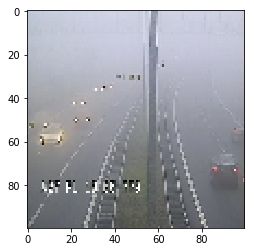

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM657/ID10966/201712/A27-HM657-ID10966_20171202_0850.jpg


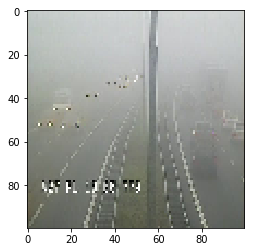

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM657/ID10966/201712/A27-HM657-ID10966_20171202_0910.jpg


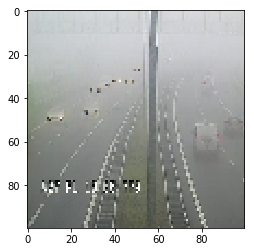

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM665/ID10963/201712/A27-HM665-ID10963_20171201_0900.jpg


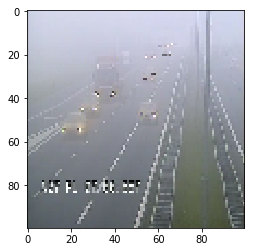

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM665/ID10963/201712/A27-HM665-ID10963_20171202_0920.jpg


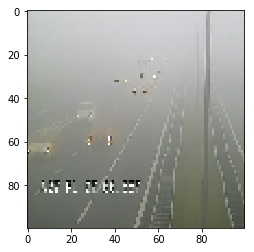

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM665/ID10963/201712/A27-HM665-ID10963_20171202_0900.jpg


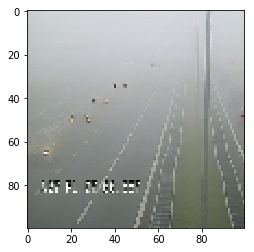

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM665/ID10963/201712/A27-HM665-ID10963_20171202_1200.jpg


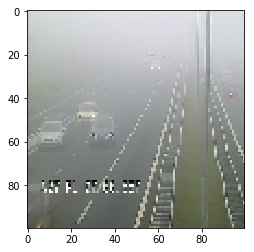

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM665/ID10963/201712/A27-HM665-ID10963_20171202_1140.jpg


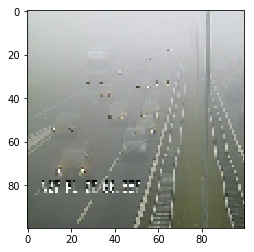

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM665/ID10963/201712/A27-HM665-ID10963_20171202_1040.jpg


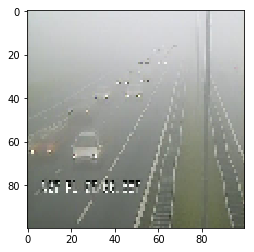

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM43/ID13972/201712/A1-HM43-ID13972_20171222_1430.jpg


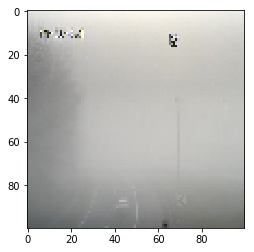

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM43/ID13972/201712/A1-HM43-ID13972_20171222_1440.jpg


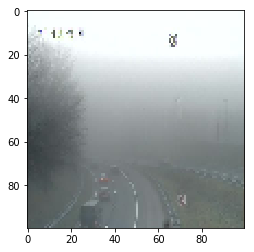

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM43/ID13972/201712/A1-HM43-ID13972_20171222_1450.jpg


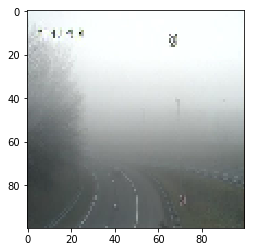

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM43/ID13972/201712/A1-HM43-ID13972_20171222_1510.jpg


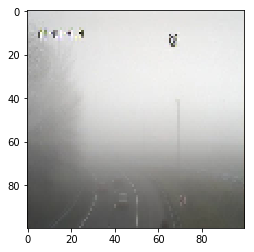

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM45/ID13971/201712/A1-HM45-ID13971_20171202_0730.jpg


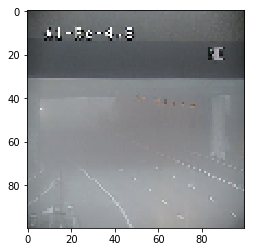

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM45/ID13971/201712/A1-HM45-ID13971_20171202_0740.jpg


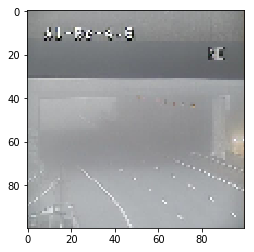

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM46/ID12951/201712/A1-HM46-ID12951_20171222_1520.jpg


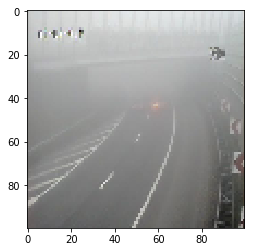

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM46/ID12952/201712/A1-HM46-ID12952_20171202_0730.jpg


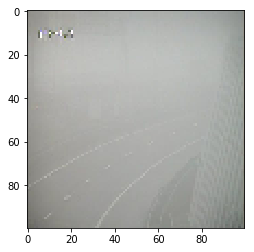

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM46/ID12952/201712/A1-HM46-ID12952_20171202_0750.jpg


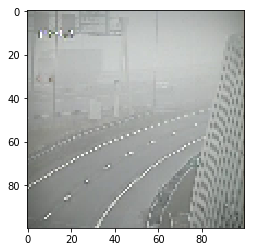

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM46/ID12952/201712/A1-HM46-ID12952_20171202_0720.jpg


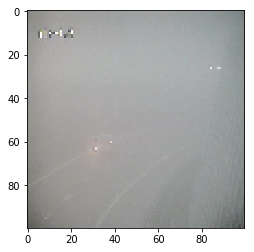

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM46/ID12952/201712/A1-HM46-ID12952_20171202_1140.jpg


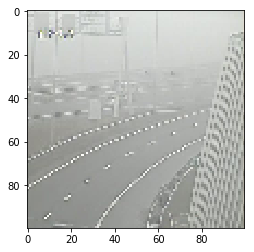

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM50/ID12954/201712/A1-HM50-ID12954_20171202_0740.jpg


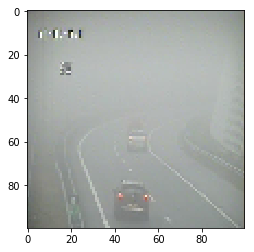

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM50/ID12954/201712/A1-HM50-ID12954_20171202_0720.jpg


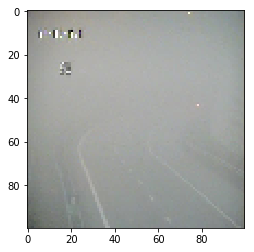

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM50/ID12954/201712/A1-HM50-ID12954_20171202_0850.jpg


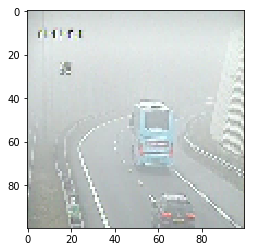

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM50/ID12954/201712/A1-HM50-ID12954_20171202_0800.jpg


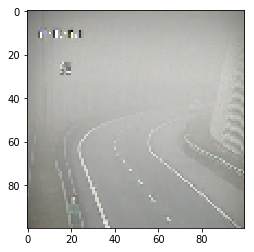

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM50/ID12954/201712/A1-HM50-ID12954_20171202_0730.jpg


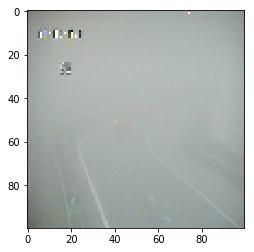

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM52/ID12955/201712/A1-HM52-ID12955_20171202_0740.jpg


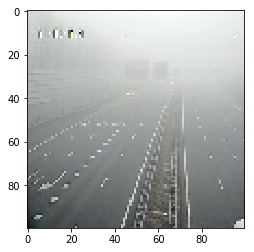

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM55/ID12956/201712/A1-HM55-ID12956_20171222_0820.jpg


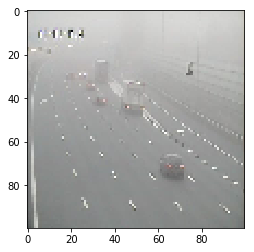

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM55/ID12956/201712/A1-HM55-ID12956_20171222_0930.jpg


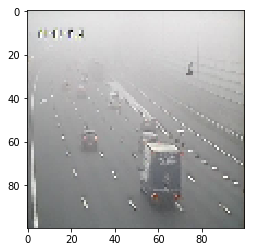

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM57/ID12957/201712/A1-HM57-ID12957_20171202_0730.jpg


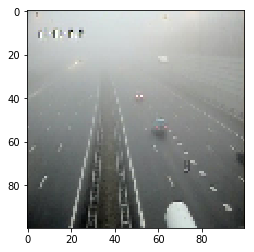

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM57/ID12957/201712/A1-HM57-ID12957_20171202_0740.jpg


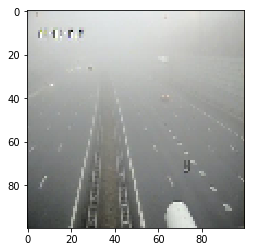

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM57/ID12957/201712/A1-HM57-ID12957_20171222_1520.jpg


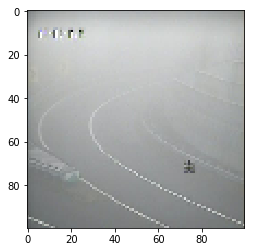

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM59/ID12960/201712/A1-HM59-ID12960_20171202_0730.jpg


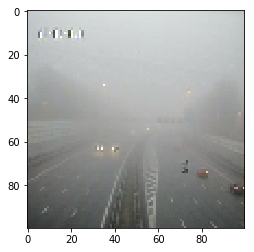

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM59/ID12960/201712/A1-HM59-ID12960_20171222_1510.jpg


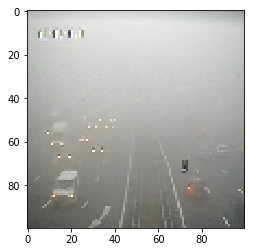

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM59/ID12960/201712/A1-HM59-ID12960_20171222_1550.jpg


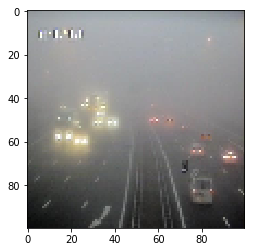

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM59/ID12960/201712/A1-HM59-ID12960_20171222_1430.jpg


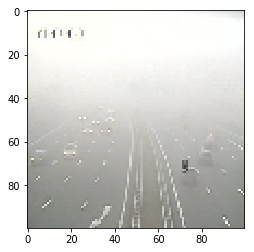

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM59/ID12960/201712/A1-HM59-ID12960_20171222_1530.jpg


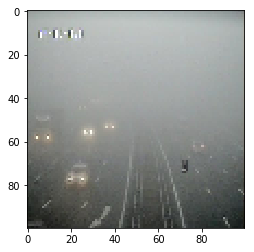

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM61/ID12961/201712/A1-HM61-ID12961_20171222_1500.jpg


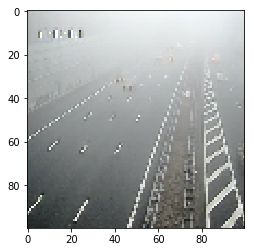

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM61/ID12961/201712/A1-HM61-ID12961_20171222_1540.jpg


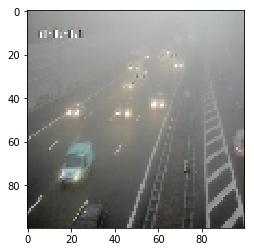

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM63/ID12964/201712/A1-HM63-ID12964_20171202_0750.jpg


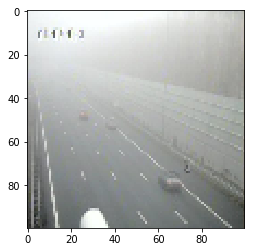

In [12]:
class_dense = list(np.where(test_targets==2))
class_light = list(np.where(test_targets==1))

for i in class_dense[0][:100]:
    
    img = test_features[i]
    print(test_filepaths[i])
    plt.imshow(img)
    plt.show()


### Class Proportions (for Weighted Sampling)

In [78]:
# Get the class proportions
class_counts = np.bincount(y_validation.astype(int))
total = len(y_validation)
proportion_0 = class_counts[0] / total
proportion_1 = class_counts[1] / total
proportion_2 = class_counts[2] / total

print('Class percentages:\nNo fog: {:.2f}%\nFog: {:.2f}%\nDense fog: {:.2f}%'.format(proportion_0 * 100,
                                                                              proportion_1 * 100, proportion_2 * 100))
print(class_counts)

NameError: name 'y_validation' is not defined

### Class Weighting

In [ ]:
# List containing class probabilities
probabilities = [proportion_0, proportion_1, proportion_2]
reciprocal_weights = []

# Put weight at every index
for i in range(len(X_train)):
    reciprocal_weights.append(probabilities[train_targets[i]])

# Inverse of probabilities as weights
weights = (1 / torch.Tensor(reciprocal_weights))
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights.double(), len(X_train))

# Inverse weights for all the datapoints
inverse_weights_class = 1 / torch.Tensor(probabilities)

# Inverse weights per class
inverse_weights = 1 / torch.Tensor(probabilities)

### Transformations

In [12]:
data_transforms = {
    'train': transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomCrop(80),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.ToPILImage(),
        transforms.CenterCrop(80),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

### Define Dataset Class

In [7]:
class KNMIDataset(Dataset):
    def __init__(self, images, targets, filepaths, transforms=None):
    
        self.transforms = transforms
        self.images = images
        self.targets = targets
        self.filepaths = filepaths
        
    def __getitem__(self, index):
        image = self.images[index]
        
        if self.transforms != None:
            image = self.transforms(image)
        
        target = self.targets[index]
        filepath = self.filepaths[index]
        
        return (image, target, index, filepath)

    def __len__(self):
        return len(self.targets)

### Create Datasets and Dataloaders

In [ ]:
BATCH_SIZE = 164

# Datasets
train_dataset = KNMIDataset(X_train, train_targets, paths_train, transforms=data_transforms['train'])
validation_dataset = KNMIDataset(X_validation, validation_targets, paths_validation, transforms=data_transforms['validation'])

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=BATCH_SIZE)

loaders = {'train': train_loader, 'validation': validation_loader}

### Check Batch Iteration Size of Trainloader

In [ ]:
# Iteration for one train/testloader batch
img, labels, idx, paths = next(iter(validation_loader))
inputs, labels = Variable(img), Variable(labels)
print('Loader image tensor shape: {}\nLoader targets tensor shape: {}'.format(inputs.size(), labels.size()))

## Plotting Functions

### Confusion Matrix

In [26]:
 # Confusion matrix helper
def show_cm(targets, predictions):
    cm = confusion_matrix(y_target=targets, 
                      y_predicted=predictions, 
                      binary=False)

    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()

### Loss Curve Plotting

In [19]:
def plot_loss_curves(training_loss, validation_loss):
    """
    Plots loss curves after model training.
    
    :param training_loss: List with training loss for every epoch.
    :param validation_loss: List with validation loss for every epoch.
    """
    train_plot, = plt.plot(training_loss, label='Training')
    val_plot, = plt.plot(validation_loss, label='Validation')
    plt.title('Loss curves (training/validation)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(handles=[train_plot, val_plot])
    plt.show()

### Certain/Uncertain Images Plotting

In [ ]:
def plot_images(loss, image_index, filepaths, targets, predictions, phase, amount=5):
    """
    Use to plot images that the model is most certain about and which it was most uncertain about.
    
    :param loss: Tensor that has size of batch containing loss
    :param filepaths: List with filepaths that point to where batch images are located
    :param amount: Amount of images to show. Default: 1
    """
    
    def loop_plot(indices, targets, predictions, filepaths, losses, phase):    
        fig=plt.figure(figsize=(20, 5))
        columns = 5
        rows = 1
        
        # Determine phase and get image np array
        if phase == 'train':
            image_array = X_train
        elif phase == 'validation':
            image_array = X_validation
        else:
            image_array = test_images
        print(filepaths)
        # Loop over the data and plot 'amount' of images
        for i, (index, target, prediction, loss) in enumerate(zip(indices, targets, predictions, losses)):
            img = image_array[index]
            fig.add_subplot(rows, columns, i + 1)
            plt.title('target: {}, prediction: {} loss: {:.2f}'.format(target, prediction, loss))
            plt.imshow(img)
      
        plt.show()
    
    def get_k_and_plot(loss, amount, targets, image_index, filepaths, predictions, phase, largest=True):
        # Get all relevant data
        values, indices = torch.topk(loss, amount, largest=largest)
        targets = [targets[i].data[0] for i in list(indices.data.numpy().reshape((1, -1))[0])]
        images_idx = [image_index[i] for i in list(indices.data.numpy().reshape((1, -1))[0])]
        filepaths = [filepaths[i] for i in list(indices.data.numpy().reshape((1, -1))[0])]
        predictions = [predictions[i] for i in list(indices.data.numpy().reshape((1, -1))[0])]
        loss = [loss.data[i] for i in list(indices.data.numpy().reshape((1, -1))[0])]

        # Show images (uncertain/certain)
        loop_plot(images_idx, targets, predictions, filepaths, loss, phase)

    print('Top {} most uncertain images'.format(amount))
    get_k_and_plot(loss, amount, targets, image_index, filepaths, predictions, phase, largest=True)

    print('Top {} most certain images'.format(amount))
    get_k_and_plot(loss, amount, targets, image_index, filepaths, predictions, phase, largest=False)

## Model Training

### Main Training Function

In [47]:
def train_model(model, criterion, optimizer, num_epochs):
    """
    Does the actual training of the models.
    
    :param model: Model object specified in 'run_model'.
    :param criterion: Optimization criterion/loss.
    :param optimizer: Type of optimizer.
    :param num_epochs: Number of epochs to train.
    """
    start = time.time()

    # For storing loss for curve, best model and best accuracy
    train_loss, validation_loss = [],[]
    best_model = model
    best_accuracy = 0.0
    best_f1macro = 0.0

    for epoch in range(num_epochs):

        # Running loss and correct predictions
        running_loss_train = 0.0
        running_correct_train = 0.0
        running_loss_val = 0.0
        running_correct_val = 0.0
        epoch_validation_targets = []
        epoch_validation_predictions = []

        for phase in ['train', 'validation']:

            # Change model mode according to phase 
            if phase == 'train':
                model.train()
            else:
                model.eval()

            # Iterate over batches in loader
            for i, (image_tensor, label_tensor, image_index, filepaths) in enumerate(loaders[phase]):

                features = Variable(image_tensor)
                targets = Variable(label_tensor.view(-1))

                # Forward + Backward + Optimize
                if phase == 'train':
                    optimizer.zero_grad()

                outputs = model(features)

                # Get prediction index and no. correct predictions
                _, predictions = torch.max(outputs.data, 1) 
                
                # Kijk hier uit dat die testloader precies aantal batches in de validation data haalt 
                correct = torch.sum(predictions == targets.data) 

                # Loss and optimization
                loss = criterion(outputs, targets)
                
                # Average the loss
                total_loss = torch.mean(loss)
                
                # Only do backpropagation if in the training phase
                if phase == 'train':
                    total_loss.backward()
                    optimizer.step()

                # Running loss and number of correct predictions
                if phase == 'train':
                    running_loss_train += total_loss.data[0]
                    running_correct_train += correct
                else:
                    running_loss_val += total_loss.data[0]
                    running_correct_val += correct
                    epoch_validation_targets.extend(list(targets.data))
                    epoch_validation_predictions.extend(list(predictions))
                    
                    # Plot images in validation phase
                    plot_images(loss, image_index, filepaths, targets, predictions, phase)

                # If model is in training phase, show loss every N iterations
                if (i+1) % 5 == 0:
                    if phase == 'train':
                        print ('Epoch {}/{}, Iteration {}/{} Train Running Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, 
                                                                                    len(X_train)//BATCH_SIZE, 
                                                                                    running_loss_train / i))
#                         plot_images(loss, image_index, filepaths, targets, predictions, phase)
                    

        # Epoch losses and epoch train accuracies
        epoch_train_loss = running_loss_train / (len(X_train)//BATCH_SIZE)
        epoch_train_accuracy = (running_correct_train / (len(X_train)//BATCH_SIZE)) / BATCH_SIZE * 100
        epoch_val_loss = running_loss_val / len(X_validation//BATCH_SIZE)
        epoch_val_accuracy= running_correct_val / len(X_validation) * 100
        
        # F1-score
        f1_macro = f1_score(epoch_validation_targets, epoch_validation_predictions, average='macro')
        f1_micro = f1_score(epoch_validation_targets, epoch_validation_predictions, average='micro')
        precision = precision_score(epoch_validation_targets, epoch_validation_predictions, average='macro')
        recall = recall_score(epoch_validation_targets, epoch_validation_predictions, average='macro')

        # Print the average epoch loss and the average prediction accuracy
        print('\nEpoch {}/{}, Train Loss: {:.4f}, Train Accuracy: {:.4f}%\n'
              'Validation Loss: {:.4f}, Validation Accuracy: {:.4f}%, f1-score {:.4f}\n'.format(epoch + 1, 
                                                                    num_epochs, epoch_train_loss, epoch_train_accuracy,
                                                                     epoch_val_loss, epoch_val_accuracy, f1))
        
        # Safe best model and best accuracy 
        if phase == 'validation':
            if epoch_val_accuracy > best_accuracy:
                best_accuracy = epoch_val_accuracy
                best_model = copy.deepcopy(model)

        # Show the confusion matrix for validation targets/predictions
        show_cm(epoch_validation_targets, epoch_validation_predictions)
        
        # Append losses
        train_loss.append(epoch_train_loss)
        validation_loss.append(epoch_val_loss)
        
    # Elapsed time and best accuracy
    elapsed_time = time.time() - start
    print('Training was completed in {:.0f}m {:.0f}s\n'.format(elapsed_time//60, elapsed_time%60))
    print('Best validation accuracy: {:4f}%'.format(best_accuracy))
    
    # Plot loss curves
    plot_loss_curves(train_loss, validation_loss)
    
    # Return the best model
    return best_model

### Run Model Function

In [48]:
def run_model(model, epochs, learning_rate, train_from_layer=False, last_layer_trained=False, not_self_defined=True):
    '''
    Configures model object and then calls 'train_model' for model training. 
    
    :param train_from_layer: Specify number of layers before fully-connected to also be finetuned. Default is False,
    which will just train the fc layers. Give a number to specify number of layers before that. 
    :param model: This is a (pre-trained) model that will be further finetuned.
    :param epochs: Number of epochs to train.
    :param learning_rate: Learning rate for the parameters.
    :param not_self_defined: True if model architecture is used from torchvision. False if model is self-defined. 
    '''
    
    if not_self_defined:
      
        # Set all parameter training to false
        for parameter in model.parameters():
            parameter.requires_grad = False

        # Select number of pre-trained layers to finetune
        if train_from_layer != False:
            ct = 0
            print(ct)

            for name, child in model.named_children():
                ct += 1

                if ct > train_from_layer:
                    for name2, params in child.named_parameters():
                        params.requires_grad = True

          # Get parameters that need finetuning
            optim_params = filter(lambda p: p.requires_grad, model.parameters())

    # Adjust final layer to number of classes if last layer has not been trained yet
    if last_layer_trained == False:
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features, TARGET_SIZE)
        optim_params = model.fc.parameters()
    
    # Train all parameters if model is not predefined from torchvision
    else: 
        optim_params = filter(lambda p: p.requires_grad, model.parameters())
    
    if torch.cuda.is_available():
        inverse_weights.cuda()
        model = model.cuda()
    
    # Optimizers and loss criterions
    criterion = nn.CrossEntropyLoss(reduce=False, weight=inverse_weights)
    optimizer = optim.Adam(optim_params, lr=learning_rate)        
    
    # Train and save
    trained_model = train_model(model, criterion, optimizer, epochs)
    
    return trained_model

### Resnet 18

In [ ]:
lr_classifier = 2e-4
lr_tuner = 1e-4

# Train last FC layer of resnet 18
resnet_18 = models.resnet18(pretrained=True)
resnet_18.avgpool = nn.AdaptiveAvgPool2d(1)
resnet_18_trained = run_model(resnet_18, 10, lr_classifier, False)

# Tune also the last convolutional layer
# resnet_18_tuned = run_model(resnet_18_trained, 15, lr_tuner, train_from_layer=7)

### Simple Network

In [34]:
class simple_CNN(nn.Module):
    def __init__(self):
        super(simple_CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=3,              # input height
                out_channels=16,            # n_filters
                kernel_size=3,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 3, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.conv3 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(32, 32, 3, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.dropout = nn.Dropout(p=0.5)
        self.out = nn.Linear(3872, 3)   # fully connected layer, output 3 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = self.dropout(x) 
        output = self.out(x)
        return output   # return x for visualization

In [ ]:
simple_model = simple_CNN()
run_model(simple_model, 10, 0.001, False, False)

## Pre-trained Model Loader

In [15]:
def load_model(filepath):
    '''
    Loads a trained model.
    
    :param filepath: Path to the trained model.
    '''
    loaded_model = torch.load(filepath, map_location=lambda storage, loc: storage)
    return loaded_model

In [127]:
TRAINED_MODELS_DIR = '/Volumes/TIMPP/TrainedModels'

loaded_checkpoint = load_model(TRAINED_MODELS_DIR + '/highway-images/resnet-18/Resnet18-FirstBest/classifier/resnet18_classifier.pth.tar')
current_model_tuned = load_model(TRAINED_MODELS_DIR + '/highway-images/resnet-18/Resnet18-FirstBest/tuner/resnet18_tuner.pth.tar')

9

In [166]:
# current_model_trained = load_model(TRAINED_MODELS_DIR + '/highway-images/resnet18/classifier')
loaded_checkpoint = load_model(TRAINED_MODELS_DIR + '/knmi-images/resnet18/tuner/KNMItuner.pth.tar')
current_model_train = loaded_checkpoint['best_model']
loaded_checkpoint['best_epoch']

19

In [128]:
def concat_loss_lists(full_train):
    '''
    :param full_train: List of model trained models in different phases.
    '''
    train_loss = []
    validation_loss = []
    
    for train_phase in full_train:
        best_epoch = train_phase['best_epoch']
        phase_train_loss = train_phase['train_loss'][:best_epoch] 
        phase_val_loss = train_phase['validation_loss'][:best_epoch]
        
        for i, j in zip(phase_train_loss, phase_val_loss):
            train_loss.append(i)
            validation_loss.append(j)
    
    return train_loss, validation_loss

## Test Model Function

### Test Dataset and Dataloader 

In [13]:
test_dataset = KNMIDataset(test_features, test_targets, test_filepaths, transforms=data_transforms['validation'])
test_dataloader = DataLoader(dataset=test_dataset, batch_size=len(test_features))

In [179]:
loaded_checkpoint = load_model('../../../../Downloads/checkpoint105.pth.tar')
current_model_train = loaded_checkpoint['state_dict']
best_epoch = loaded_checkpoint['best_epoch']
best_epoch

33

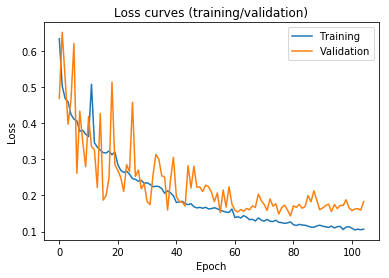

In [176]:
plot_loss_curves(loaded_checkpoint['train_loss'], loaded_checkpoint['validation_loss'])

### Model Test Function

/Volumes/TIMKNMI/KNMIPictures/RWS/A15/HM801/ID12047/201708/A15-HM801-ID12047_20170801_0932.jpg
0


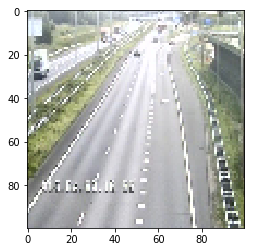

/Volumes/TIMKNMI/KNMIPictures/RWS/A15/HM801/ID12047/201708/A15-HM801-ID12047_20170803_1032.jpg
0


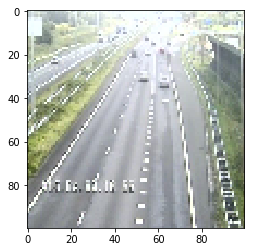

/Volumes/TIMKNMI/KNMIPictures/RWS/A15/HM801/ID12047/201708/A15-HM801-ID12047_20170811_1432.jpg
0


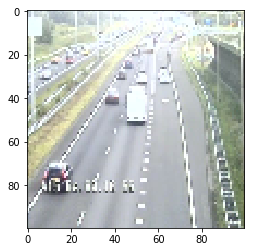

/Volumes/TIMKNMI/KNMIPictures/RWS/A15/HM801/ID12047/201708/A15-HM801-ID12047_20170813_1532.jpg
0


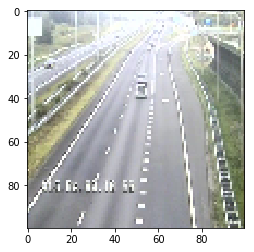

/Volumes/TIMKNMI/KNMIPictures/RWS/A2/HM894/ID13471/201711/A2-HM894-ID13471_20171108_1140.jpg
0


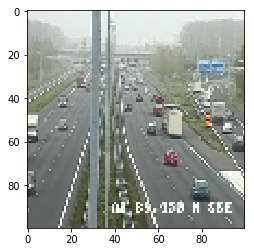

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM577/ID10979/201802/A27-HM577-ID10979_20180210_0950.jpg
0


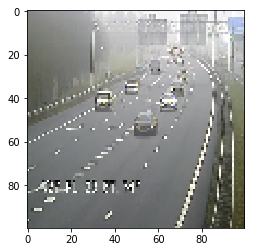

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM577/ID10979/201712/A27-HM577-ID10979_20171202_0810.jpg
2


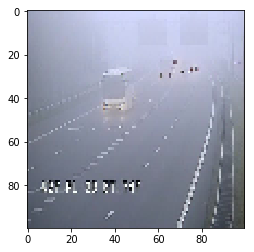

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM584/ID10976/201709/A27-HM584-ID10976_20170917_0711.jpg
2


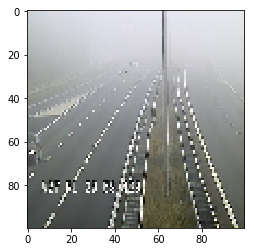

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM584/ID10976/201709/A27-HM584-ID10976_20170926_0651.jpg
2


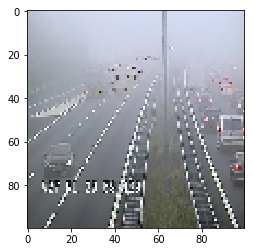

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM584/ID10976/201709/A27-HM584-ID10976_20170926_0701.jpg
2


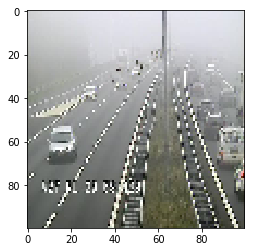

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM589/ID10974/201709/A27-HM589-ID10974_20170919_0641.jpg
2


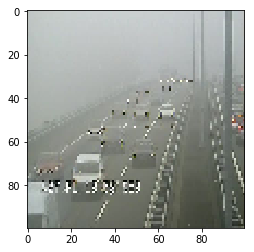

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM589/ID10974/201709/A27-HM589-ID10974_20170923_0731.jpg
2


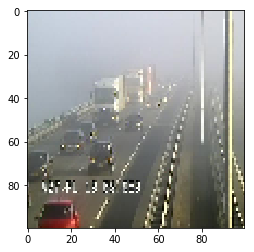

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM645/ID10971/201712/A27-HM645-ID10971_20171202_0810.jpg
2


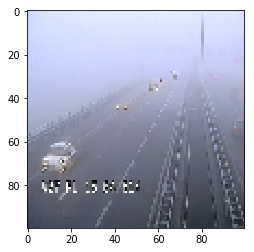

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM645/ID10971/201712/A27-HM645-ID10971_20171202_0830.jpg
2


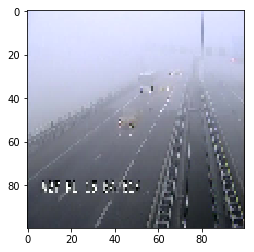

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171201_0810.jpg
2


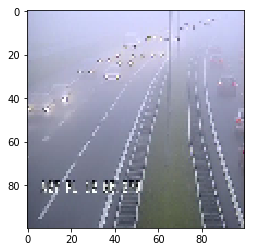

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171202_0800.jpg
2


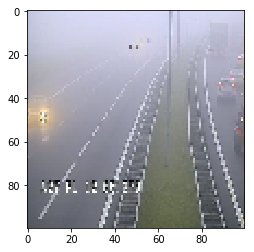

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM652/ID10968/201712/A27-HM652-ID10968_20171202_0810.jpg
2


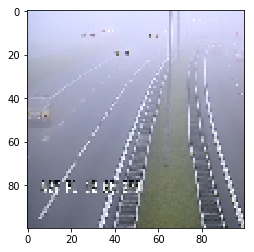

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM657/ID10966/201712/A27-HM657-ID10966_20171202_0830.jpg
2


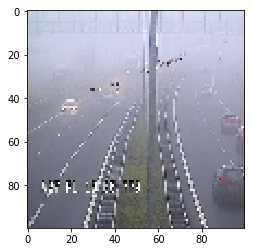

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM657/ID10966/201712/A27-HM657-ID10966_20171202_0840.jpg
2


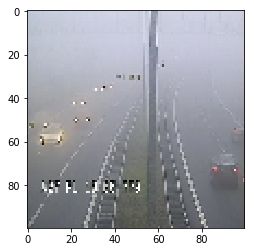

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM657/ID10966/201712/A27-HM657-ID10966_20171202_0910.jpg
2


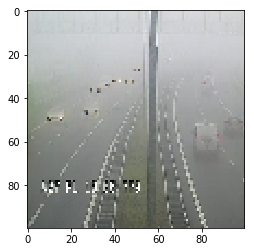

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM46/ID12952/201712/A1-HM46-ID12952_20171202_1140.jpg
2


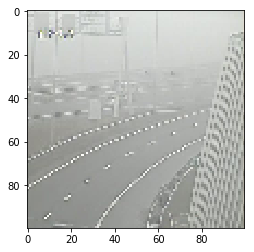

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM59/ID12960/201712/A1-HM59-ID12960_20171202_1410.jpg
0


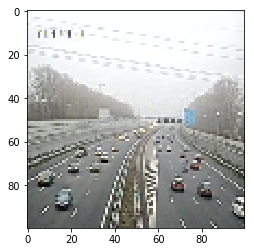

/Volumes/TIMKNMI/KNMIPictures/RWS/A1/HM63/ID12964/201712/A1-HM63-ID12964_20171202_1330.jpg
0


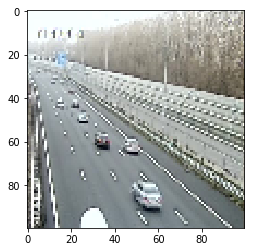

/Volumes/TIMKNMI/KNMIPictures/RWS/A4/HM448/ID12002/201712/A4-HM448-ID12002_20171222_0750.jpg
2


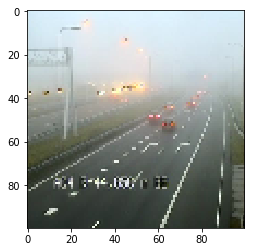

/Volumes/TIMKNMI/KNMIPictures/RWS/A4/HM638/ID111928/201712/A4-HM638-ID111928_20171222_0800.jpg
2


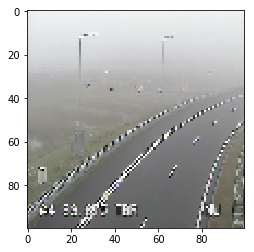

/Volumes/TIMKNMI/KNMIPictures/RWS/A5/HM121/ID13777/201712/A5-HM121-ID13777_20171202_0750.jpg
2


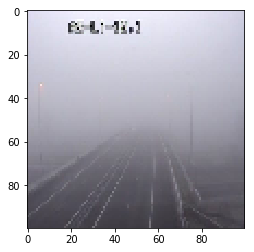

/Volumes/TIMKNMI/KNMIPictures/RWS/A5/HM121/ID13777/201712/A5-HM121-ID13777_20171202_0800.jpg
2


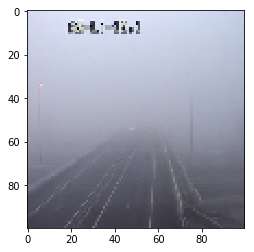

/Volumes/TIMKNMI/KNMIPictures/RWS/A15/HM257/ID13552/201712/A15-HM257-ID13552_20171202_0820.jpg
2


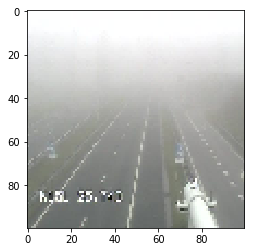

/Volumes/TIMKNMI/KNMIPictures/RWS/A15/HM259/ID13553/201712/A15-HM259-ID13553_20171221_1110.jpg
2


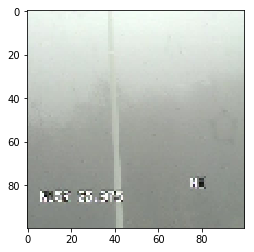

/Volumes/TIMKNMI/KNMIPictures/RWS/A15/HM397/ID106985/201712/A15-HM397-ID106985_20171201_0830.jpg
2


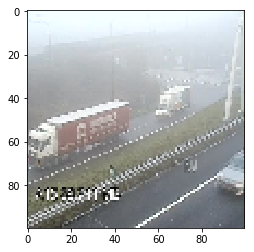

/Volumes/TIMKNMI/KNMIPictures/RWS/A15/HM795/ID12044/201804/A15-HM795-ID12044_20180404_1100.jpg
0


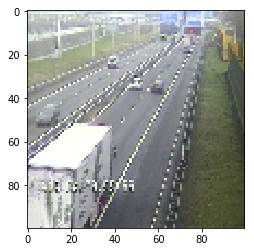

/Volumes/TIMKNMI/KNMIPictures/RWS/A15/HM801/ID12047/201707/A15-HM801-ID12047_20170701_1012.jpg
0


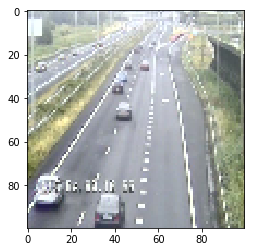

/Volumes/TIMKNMI/KNMIPictures/RWS/A16/HM209/ID71700/201712/A16-HM209-ID71700_20171222_0740.jpg
2


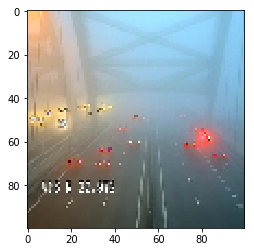

/Volumes/TIMKNMI/KNMIPictures/RWS/A16/HM264/ID12263/201712/A16-HM264-ID12263_20171201_0850.jpg
2


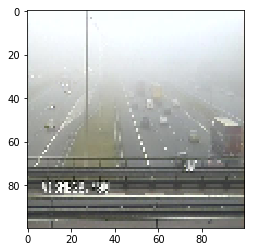

/Volumes/TIMKNMI/KNMIPictures/RWS/A27/HM577/ID10979/201712/A27-HM577-ID10979_20171202_0810.jpg
2


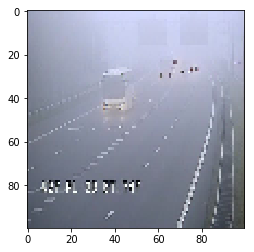

/Volumes/TIMKNMI/KNMIPictures/RWS/A28/HM1989/ID11817/201803/A28-HM1989-ID11817_20180309_1110.jpg
0


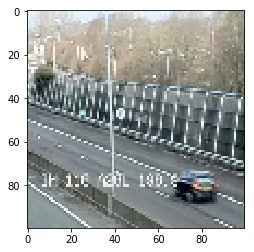

/Volumes/TIMKNMI/KNMIPictures/RWS/A50/HM1835/ID11509/201712/A50-HM1835-ID11509_20171202_0940.jpg
2


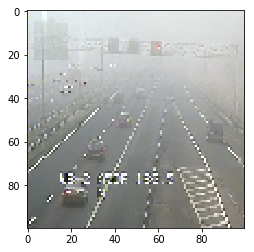

/Volumes/TIMKNMI/KNMIPictures/RWS/A50/HM1849/ID11645/201712/A50-HM1849-ID11645_20171223_1330.jpg
0


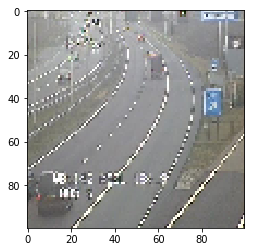

/Volumes/TIMKNMI/KNMIPictures/RWS/A50/HM1864/ID11640/201712/A50-HM1864-ID11640_20171201_1140.jpg
0


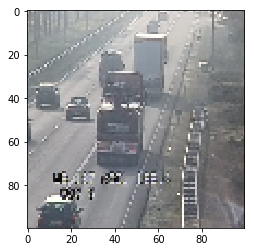

Test accuracy: 81.01%


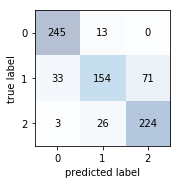

In [185]:
def test_model(model, dataloader):
    """
    Tests a specified model on all the manually labeled highway camera
    images. 
    
    :param model: Trained model to evaluate
    :param test_features: All test features as tensor
    :param test_targets: All test labels as tensor
    """
    
    test_images, test_targets, idx, test_filepaths = next(iter(dataloader))
    
    # Loss criterion
    criterion = nn.CrossEntropyLoss(reduce=False)
    
    # Wrap tensors
    features = Variable(test_images)
    targets = Variable(test_targets)
    total = len(targets)
    
    model.eval()
    
    # Feed test features into model
    outputs = model(features)
    
    # Loss and optimization
    loss = criterion(outputs, targets)
    
    # Get test predictions and number of correct predictions
    _, predictions = torch.max(outputs.data, 1) 
    correct = torch.sum(predictions == targets.data)
    
    corrects = predictions == targets.data
    
    for i, cor in enumerate(corrects):
        if predictions[i] == 1 and cor == 0:
            print(test_filepaths[i])
            print(test_targets[i])
            img = test_features[i]
            plt.imshow(img)
            plt.show()
            
    
    image_indices = list(range(0, total))
#     plot_images(loss, image_indices, test_filepaths, targets, predictions, phase='test')
    
    test_accuracy = correct / total * 100  
    print('Test accuracy: {:.2f}%'.format(test_accuracy))
    show_cm(list(targets.data), list(predictions))
    
test_model(current_model_train, test_dataloader)